In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

This notebook takes a high-frequency dataset containing information about Bitcoin prices and summarizes this information into a concise dataset used later on in this research.

Inputs: 
- __"train.csv"__ = high-frequency dataset regarding cryptocurrency from Kaggle (https://www.kaggle.com/competitions/g-research-crypto-forecasting)
- __"asset_details.csv"__ = mapping table to extract only asset IDs revelant for the scope of the research, Bitcoin

Output:
- __"volatilities.csv"__ = dataset containing information about realized volatility and variance

In [2]:
assets = pd.read_csv("asset_details.csv")
assets.sort_values("Weight", ascending=False)s

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


In [3]:
data = pd.read_csv("train.csv")

# Filter for Bitcoin only
data = data[data["Asset_ID"] == 1]

# Standard preprocessing to easily manipulate data
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.set_index('timestamp', inplace=True)
data

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
2018-01-01 00:02:00,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2018-01-01 00:03:00,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
2018-01-01 00:04:00,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
2018-01-01 00:05:00,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


Since we have a minute-data, let's convert it to 5-minute frequency in order to reduce noise and improve the information when computing volatility.

In [4]:
dta = data.copy()
dta = dta.resample('5T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})
dta

,Open,High,Low,Close
timestamp,,,,
2018-01-01 00:00:00,13835.194000,14052.30,13576.28,13768.040000
2018-01-01 00:05:00,13766.000000,14001.40,13501.01,13720.260000
2018-01-01 00:10:00,13713.610000,13948.60,13400.01,13697.658000
2018-01-01 00:15:00,13702.502000,13893.90,13402.00,13626.110000
2018-01-01 00:20:00,13626.248000,13826.80,13410.44,13603.748000
...,...,...,...,...
2021-09-20 23:40:00,42632.465000,42827.10,42607.50,42657.202500
2021-09-20 23:45:00,42655.528484,42937.31,42630.17,42898.565000
2021-09-20 23:50:00,42896.174286,43014.98,42852.07,42985.482857


In [5]:
# Calculating Bitcoin returns
dta['Return'] = np.log(dta['Close'] / dta['Open'])
dta.dropna(inplace=True)
dta.isna().sum()
dta

,Open,High,Low,Close,Return
timestamp,,,,,
2018-01-01 00:00:00,13835.194000,14052.30,13576.28,13768.040000,-0.004866
2018-01-01 00:05:00,13766.000000,14001.40,13501.01,13720.260000,-0.003328
2018-01-01 00:10:00,13713.610000,13948.60,13400.01,13697.658000,-0.001164
2018-01-01 00:15:00,13702.502000,13893.90,13402.00,13626.110000,-0.005591
2018-01-01 00:20:00,13626.248000,13826.80,13410.44,13603.748000,-0.001653
...,...,...,...,...,...
2021-09-20 23:40:00,42632.465000,42827.10,42607.50,42657.202500,0.000580
2021-09-20 23:45:00,42655.528484,42937.31,42630.17,42898.565000,0.005681
2021-09-20 23:50:00,42896.174286,43014.98,42852.07,42985.482857,0.002080


In [6]:
dta['SqrdRets'] = dta['Return']**2

# Step 2: Aggregate squared returns by day to get daily realized variance
# This creates a Series with daily realized variance
daily_realized_variance = dta['SqrdRets'].resample('D').sum()

# Step 3: Calculate daily realized volatility as the square root of daily realized variance
# This also creates a Series
daily_realized_volatility = np.sqrt(daily_realized_variance)


# Now, create a new DataFrame 'dailydta' with both columns
dailydta = pd.DataFrame({
    "RealizedVariance": daily_realized_variance,
    "RealizedVolatility": daily_realized_volatility
})

# Calculate t-1 daily volatility
dailydta['DailyVolatility'] = dailydta['DailyVolatility'].shift(1) 

# Calculate rolling weekly volatility
dailydta['WeeklyVolatility'] = dailydta['RealizedVolatility'].rolling(window=7, min_periods=1).mean()

# Calculate rolling monthly volatility
dailydta['MonthlyVolatility'] = dailydta['RealizedVolatility'].rolling(window=30, min_periods=1).mean()

dailydta

,RealizedVariance,RealizedVolatility,VolatilityTminus1,WeeklyVolatility,MonthlyVolatility
timestamp,,,,,
2018-01-01,3.792902e-03,0.061587,NaN,0.061587,0.061587
2018-01-02,4.930142e-03,0.070215,0.061587,0.065901,0.065901
2018-01-03,2.105910e-03,0.045890,0.070215,0.059231,0.059231
2018-01-04,2.274974e-03,0.047697,0.045890,0.056347,0.056347
2018-01-05,2.440460e-03,0.049401,0.047697,0.054958,0.054958
...,...,...,...,...,...
2021-09-17,5.392992e-04,0.023223,0.026468,0.029292,0.031734
2021-09-18,4.285451e-04,0.020701,0.023223,0.029134,0.031321
2021-09-19,4.496142e-04,0.021204,0.020701,0.028146,0.031070


## Obtained Volatility Visualization

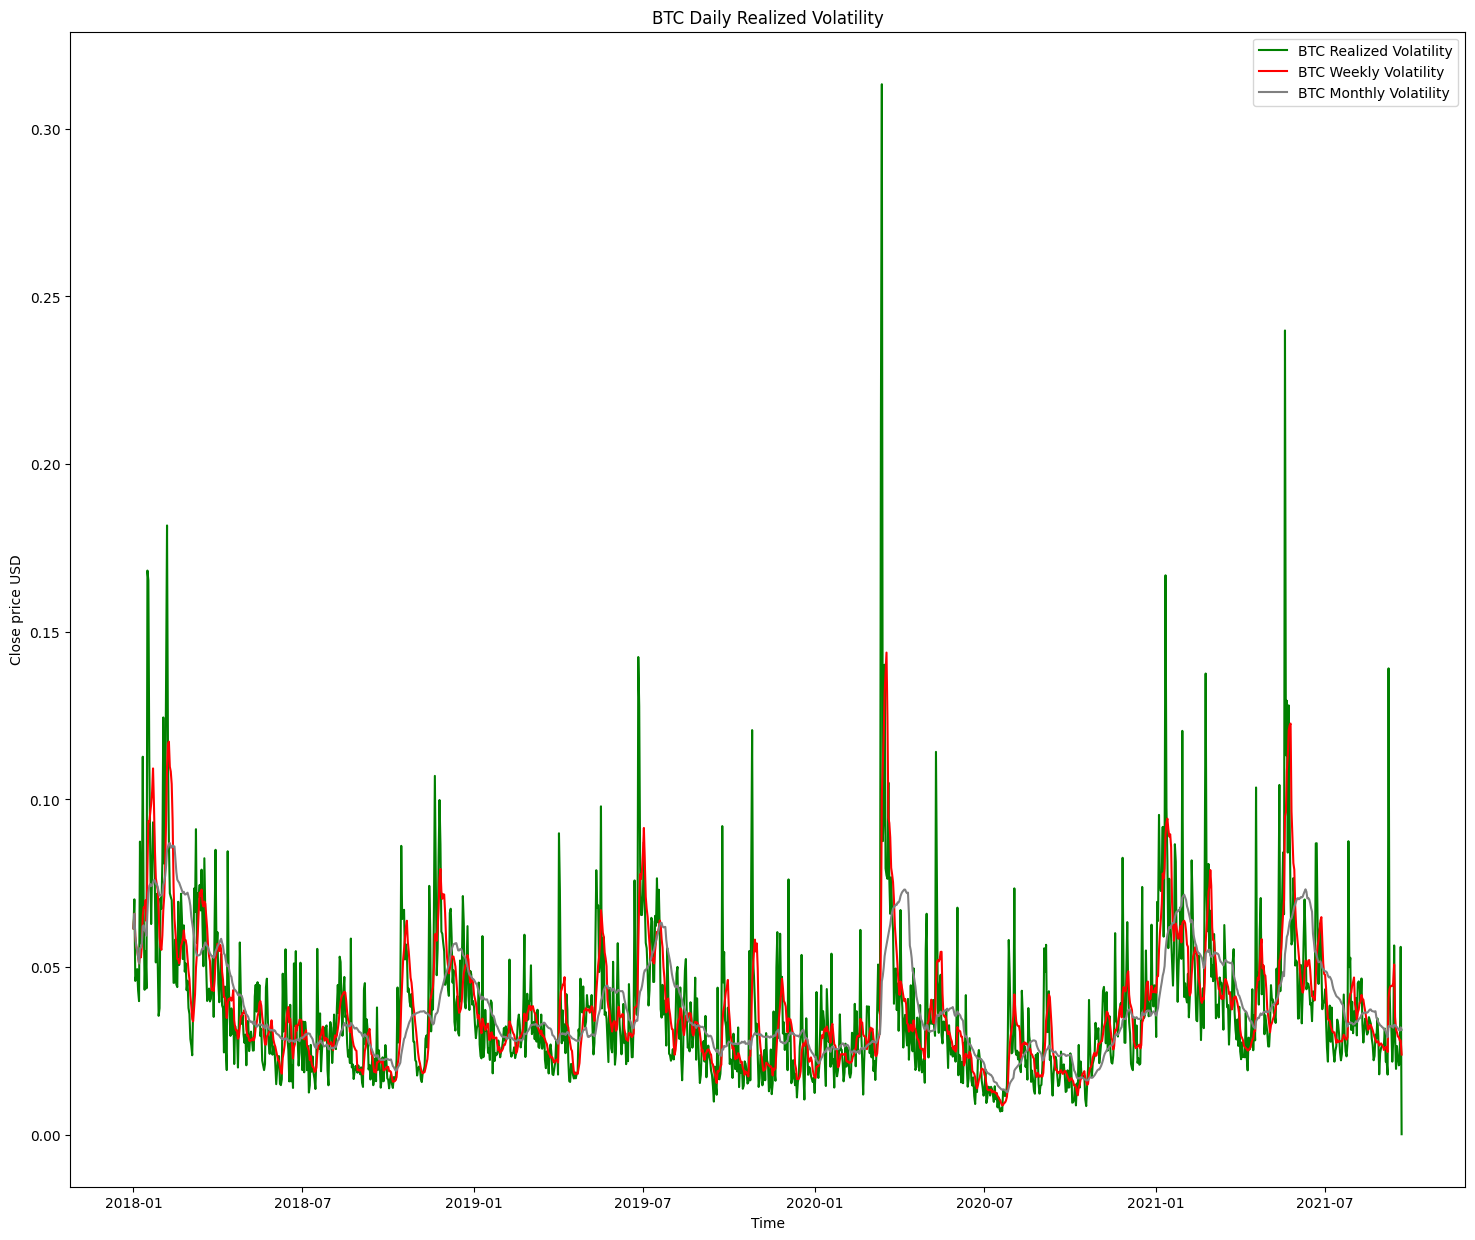

In [7]:
plt.figure(figsize=(18, 15))

plt.plot(dailydta["RealizedVolatility"], label="BTC Realized Volatility", color="green")
plt.plot(dailydta["WeeklyVolatility"], label="BTC Weekly Volatility", color="red")
plt.plot(dailydta["MonthlyVolatility"], label="BTC Monthly Volatility", color="grey")
plt.title('BTC Daily Realized Volatility') # Corrected from plt.set_title to plt.title
plt.xlabel('Time') # Corrected from plt.set_xlabel to plt.xlabel
plt.ylabel('Close price USD') # Corrected from plt.set_ylabel to plt.ylabel
plt.legend()

plt.show()

In [8]:
dailydta.to_csv("HighFrequency.csv")